In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load data from data.json
with open('data.json', 'r') as file:
    data = json.load(file)

In [2]:
def plot_probabilities(data, filter=None):
    filtered_data = data.copy()
    filter_name = 'All'

    if filter == "repeats":
        # Filter data to include only words with a single unique letter
        filtered_data = {word: probs for word, probs in filtered_data.items() if len(set(word)) == 1}
        filter_name = 'Single-Letter'
    elif filter == "random":
        # Load random words from random_words.json
        with open('lists/random_words.json', 'r') as file:
            random_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in random_words if word in filtered_data}
        filter_name = 'Real'
    elif filter == "shuffled":
        # Load shuffled words from shuffled_words.json
        with open('lists/shuffled_words.json', 'r') as file:
            shuffled_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}
        filter_name = 'Scrambled'
    # Initialize dictionaries to store sums and counts for each word length
    length_sums = {}
    length_counts = {}

    # Iterate through the data and collect word lengths and probabilities
    for word, probs in filtered_data.items():
        word_length = len(word)
        if word_length not in length_sums:
            length_sums[word_length] = {
                "gpt-3.5-turbo-0125": 0,
                "gpt-4": 0,
                "meta-llama/Llama-2-7b-chat-hf": 0,
                "meta-llama/Meta-Llama-3-8B-Instruct": 0
            }
            length_counts[word_length] = 0

        length_sums[word_length]["gpt-3.5-turbo-0125"] += probs["gpt-3.5-turbo-0125"]
        length_sums[word_length]["gpt-4"] += probs["gpt-4"]
        length_sums[word_length]["meta-llama/Llama-2-7b-chat-hf"] += probs["meta-llama/Llama-2-7b-chat-hf"]
        length_sums[word_length]["meta-llama/Meta-Llama-3-8B-Instruct"] += probs["meta-llama/Meta-Llama-3-8B-Instruct"]
        length_counts[word_length] += 1

    # Calculate average probabilities for each word length
    word_lengths = sorted(length_sums.keys())
    gpt_3_5_avg_probs = [length_sums[length]["gpt-3.5-turbo-0125"] / length_counts[length] for length in word_lengths]
    gpt_4_avg_probs = [length_sums[length]["gpt-4"] / length_counts[length] for length in word_lengths]
    llama_2_avg_probs = [length_sums[length]["meta-llama/Llama-2-7b-chat-hf"] / length_counts[length] for length in word_lengths]
    llama_3_avg_probs = [length_sums[length]["meta-llama/Meta-Llama-3-8B-Instruct"] / length_counts[length] for length in word_lengths]

    # Plot the data
    plt.figure(figsize=(12, 8))

    plt.plot(word_lengths, gpt_4_avg_probs, label="gpt-4", marker='o')
    plt.plot(word_lengths, gpt_3_5_avg_probs, label="gpt-3.5-turbo-0125", marker='o')
    plt.plot(word_lengths, llama_3_avg_probs, label="meta-llama/Meta-Llama-3-8B-Instruct", marker='o')
    plt.plot(word_lengths, llama_2_avg_probs, label="meta-llama/Llama-2-7b-chat-hf", marker='o')

    plt.xlabel('Word Length')
    plt.ylabel('Average Probability')
    plt.title('Average Probability of Being Long for Different Models by Word Length' + (f' ({filter_name} Words)' if filter else ''))
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(word_lengths), max(word_lengths) + 1, 1))
    plt.show()


In [3]:
def plot_shuffled_random_diffs(data):
    filtered_data = data.copy()
    # Load random words from random_words.json
    with open('lists/random_words.json', 'r') as file:
        random_words = json.load(file)
    random_filtered_data = {word: filtered_data[word] for word in random_words if word in filtered_data}
    
    # Load shuffled words from shuffled_words.json
    with open('lists/shuffled_words.json', 'r') as file:
        shuffled_words = json.load(file)
    shuffled_filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}
    
    # Initialize dictionaries to store sums and counts for each word length for both random and shuffled data
    random_length_sums = {}
    random_length_counts = {}
    shuffled_length_sums = {}
    shuffled_length_counts = {}
    
    # Iterate through the random filtered data and collect word lengths and probabilities
    for word, probs in random_filtered_data.items():
        word_length = len(word)
        if word_length not in random_length_sums:
            random_length_sums[word_length] = {
                "gpt-3.5-turbo-0125": 0,
                "gpt-4": 0,
                "meta-llama/Llama-2-7b-chat-hf": 0,
                "meta-llama/Meta-Llama-3-8B-Instruct": 0
            }
            random_length_counts[word_length] = 0

        random_length_sums[word_length]["gpt-3.5-turbo-0125"] += probs["gpt-3.5-turbo-0125"]
        random_length_sums[word_length]["gpt-4"] += probs["gpt-4"]
        random_length_sums[word_length]["meta-llama/Llama-2-7b-chat-hf"] += probs["meta-llama/Llama-2-7b-chat-hf"]
        random_length_sums[word_length]["meta-llama/Meta-Llama-3-8B-Instruct"] += probs["meta-llama/Meta-Llama-3-8B-Instruct"]
        random_length_counts[word_length] += 1
    
    # Iterate through the shuffled filtered data and collect word lengths and probabilities
    for word, probs in shuffled_filtered_data.items():
        word_length = len(word)
        if word_length not in shuffled_length_sums:
            shuffled_length_sums[word_length] = {
                "gpt-3.5-turbo-0125": 0,
                "gpt-4": 0,
                "meta-llama/Llama-2-7b-chat-hf": 0,
                "meta-llama/Meta-Llama-3-8B-Instruct": 0
            }
            shuffled_length_counts[word_length] = 0

        shuffled_length_sums[word_length]["gpt-3.5-turbo-0125"] += probs["gpt-3.5-turbo-0125"]
        shuffled_length_sums[word_length]["gpt-4"] += probs["gpt-4"]
        shuffled_length_sums[word_length]["meta-llama/Llama-2-7b-chat-hf"] += probs["meta-llama/Llama-2-7b-chat-hf"]
        shuffled_length_sums[word_length]["meta-llama/Meta-Llama-3-8B-Instruct"] += probs["meta-llama/Meta-Llama-3-8B-Instruct"]
        shuffled_length_counts[word_length] += 1
    
    # Calculate average probabilities for each word length for both random and shuffled data
    word_lengths = sorted(set(random_length_sums.keys()).intersection(set(shuffled_length_sums.keys())))
    gpt_3_5_avg_probs_diff = [(random_length_sums[length]["gpt-3.5-turbo-0125"] / random_length_counts[length]) - (shuffled_length_sums[length]["gpt-3.5-turbo-0125"] / shuffled_length_counts[length]) for length in word_lengths]
    gpt_4_avg_probs_diff = [(random_length_sums[length]["gpt-4"] / random_length_counts[length]) - (shuffled_length_sums[length]["gpt-4"] / shuffled_length_counts[length]) for length in word_lengths]
    llama_2_avg_probs_diff = [(random_length_sums[length]["meta-llama/Llama-2-7b-chat-hf"] / random_length_counts[length]) - (shuffled_length_sums[length]["meta-llama/Llama-2-7b-chat-hf"] / shuffled_length_counts[length]) for length in word_lengths]
    llama_3_avg_probs_diff = [(random_length_sums[length]["meta-llama/Meta-Llama-3-8B-Instruct"] / random_length_counts[length]) - (shuffled_length_sums[length]["meta-llama/Meta-Llama-3-8B-Instruct"] / shuffled_length_counts[length]) for length in word_lengths]
    
    # Plot the data
    plt.figure(figsize=(12, 8))

    plt.plot(word_lengths, gpt_4_avg_probs_diff, label="gpt-4", marker='o')
    plt.plot(word_lengths, gpt_3_5_avg_probs_diff, label="gpt-3.5-turbo-0125", marker='o')
    plt.plot(word_lengths, llama_3_avg_probs_diff, label="meta-llama/Meta-Llama-3-8B-Instruct", marker='o')
    plt.plot(word_lengths, llama_2_avg_probs_diff, label="meta-llama/Llama-2-7b-chat-hf", marker='o')

    plt.xlabel('Word Length')
    plt.ylabel('Average Probability Difference')
    plt.title('Difference in Average Probability of Being Long for Different Models by Word Length (Random - Shuffled)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(word_lengths), max(word_lengths) + 1, 1))
    plt.show()

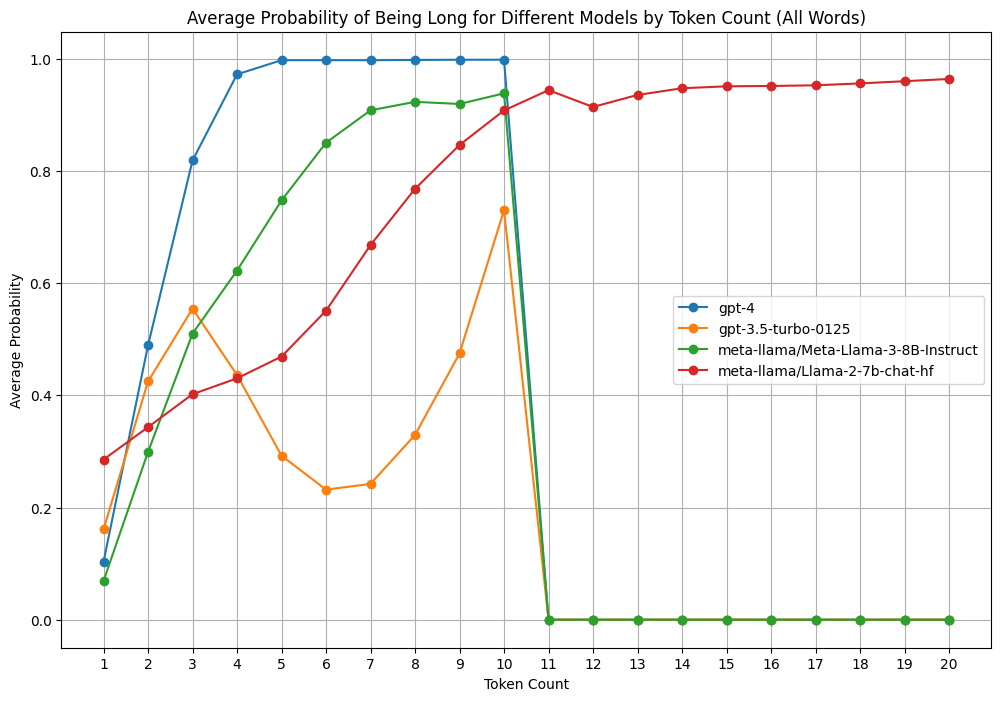

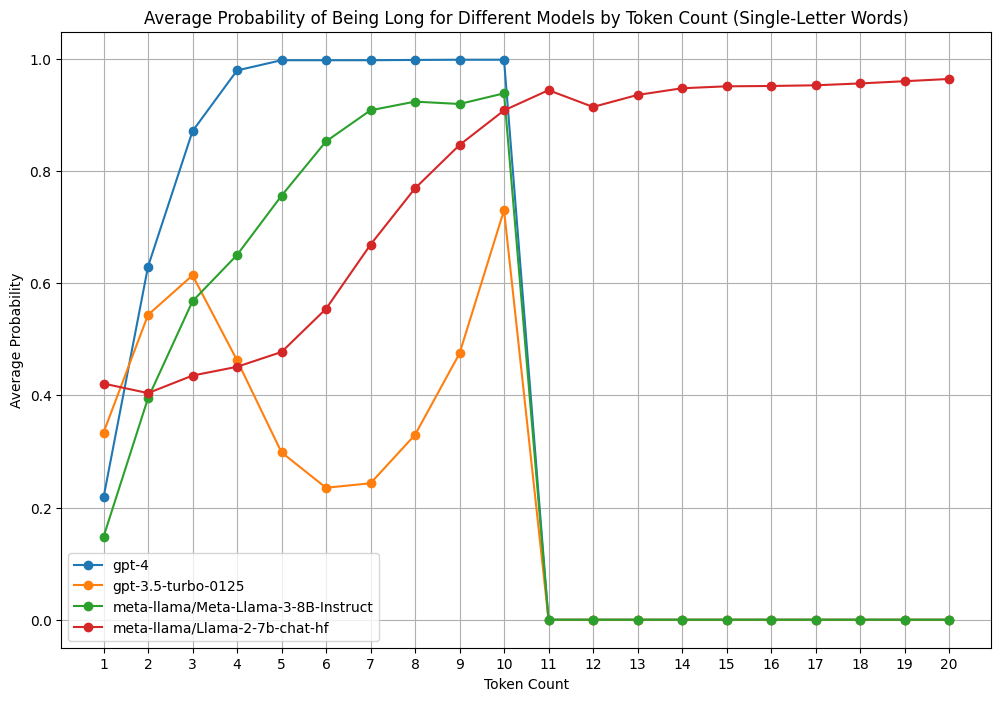

ValueError: min() iterable argument is empty

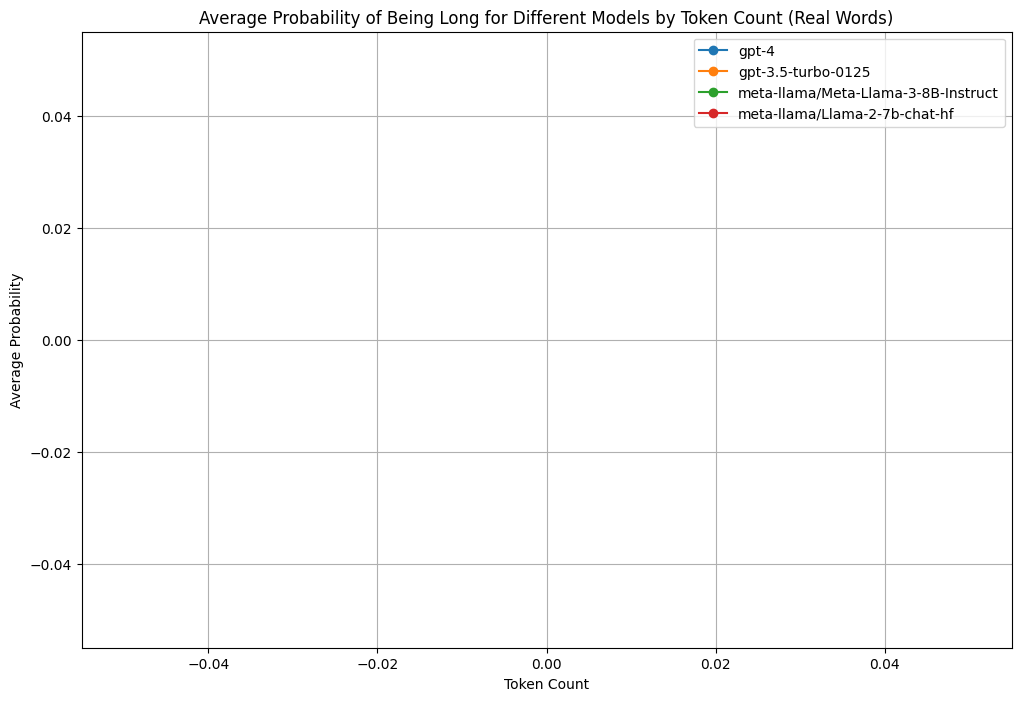

In [4]:
def plot_avg_probabilities_by_token_count(data, filter=None):
    filtered_data = data.copy()
    filter_name = 'All'

    if filter == "repeats":
        filtered_data = {word: probs for word, probs in data.items() if len(set(word)) != len(word)}
        filter_name = 'Single-Letter'
    elif filter == "random":
        filtered_data = {word: probs for word, probs in data.items() if "random" in word}
        filter_name = 'Real'
    elif filter == "shuffled":
        filtered_data = {word: probs for word, probs in data.items() if "shuffled" in word}
        filter_name = 'Scrambled'

    # Calculate average probabilities for each token length for each model
    token_lengths = sorted(set(len(probs["gpt_tokens"]) for probs in filtered_data.values()).union(
                           set(len(probs["llama2_tokens"]) for probs in filtered_data.values())).union(
                           set(len(probs["llama3_tokens"]) for probs in filtered_data.values())))

    gpt_3_5_avg_probs = []
    gpt_4_avg_probs = []
    llama_2_avg_probs = []
    llama_3_avg_probs = []

    for length in token_lengths:
        gpt_3_5_probs = [probs["gpt-3.5-turbo-0125"] for probs in filtered_data.values() if len(probs["gpt_tokens"]) == length]
        gpt_4_probs = [probs["gpt-4"] for probs in filtered_data.values() if len(probs["gpt_tokens"]) == length]
        llama_2_probs = [probs["meta-llama/Llama-2-7b-chat-hf"] for probs in filtered_data.values() if len(probs["llama2_tokens"]) == length]
        llama_3_probs = [probs["meta-llama/Meta-Llama-3-8B-Instruct"] for probs in filtered_data.values() if len(probs["llama3_tokens"]) == length]

        gpt_3_5_avg_probs.append(sum(gpt_3_5_probs) / len(gpt_3_5_probs) if gpt_3_5_probs else 0)
        gpt_4_avg_probs.append(sum(gpt_4_probs) / len(gpt_4_probs) if gpt_4_probs else 0)
        llama_2_avg_probs.append(sum(llama_2_probs) / len(llama_2_probs) if llama_2_probs else 0)
        llama_3_avg_probs.append(sum(llama_3_probs) / len(llama_3_probs) if llama_3_probs else 0)

    # Plot the data
    plt.figure(figsize=(12, 8))

    plt.plot(token_lengths, gpt_4_avg_probs, label="gpt-4", marker='o')
    plt.plot(token_lengths, gpt_3_5_avg_probs, label="gpt-3.5-turbo-0125", marker='o')
    plt.plot(token_lengths, llama_3_avg_probs, label="meta-llama/Meta-Llama-3-8B-Instruct", marker='o')
    plt.plot(token_lengths, llama_2_avg_probs, label="meta-llama/Llama-2-7b-chat-hf", marker='o')

    plt.xlabel('Token Count')
    plt.ylabel('Average Probability')
    plt.title(f'Average Probability of Being Long for Different Models by Token Count ({filter_name} Words)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(token_lengths), max(token_lengths) + 1, 1))
    plt.show()

# Example usage
plot_avg_probabilities_by_token_count(data)
plot_avg_probabilities_by_token_count(data, filter="repeats")
plot_avg_probabilities_by_token_count(data, filter="random")
plot_avg_probabilities_by_token_count(data, filter="shuffled")

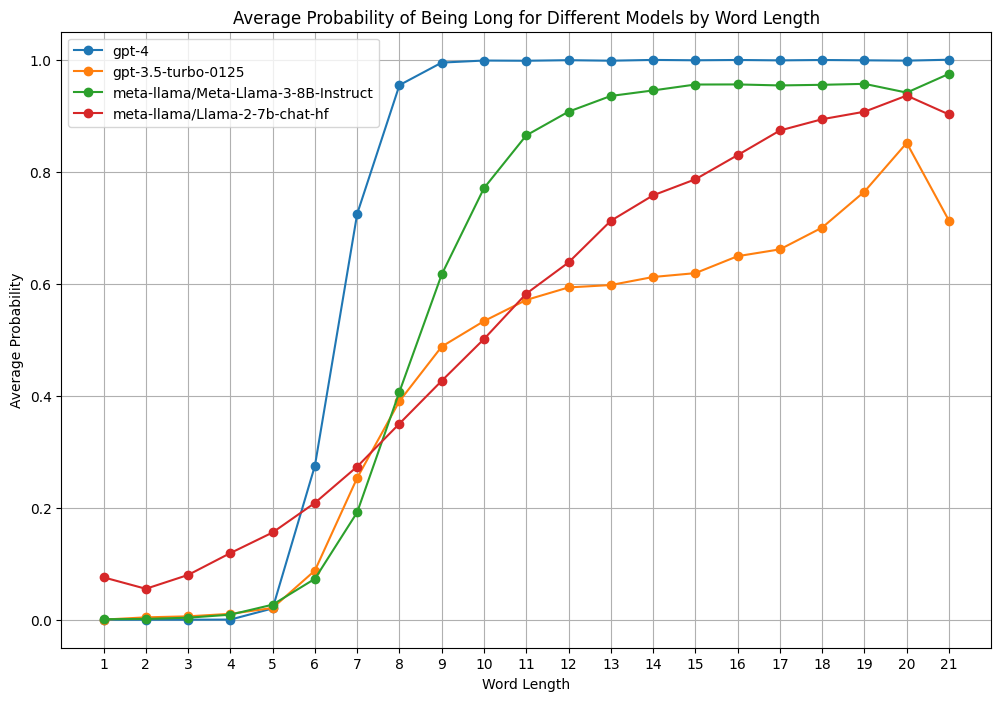

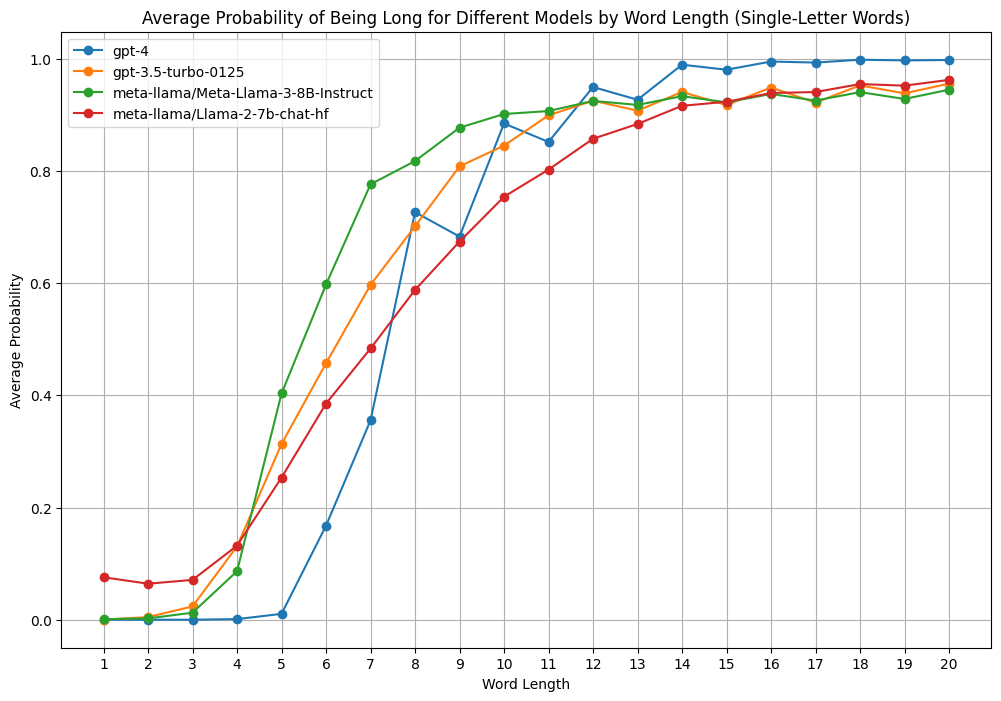

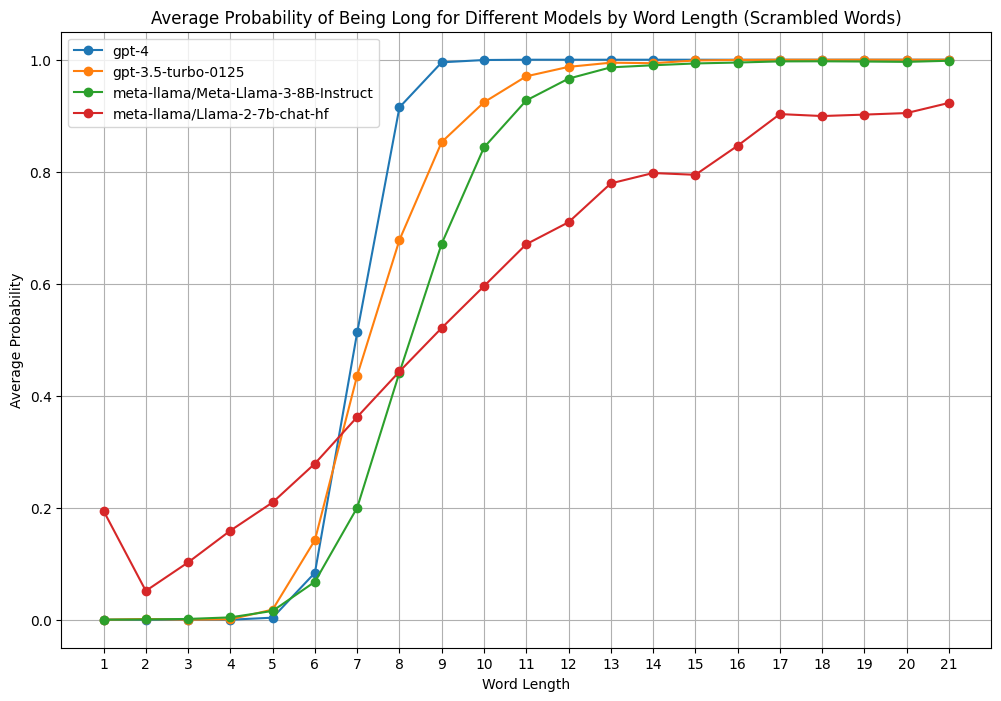

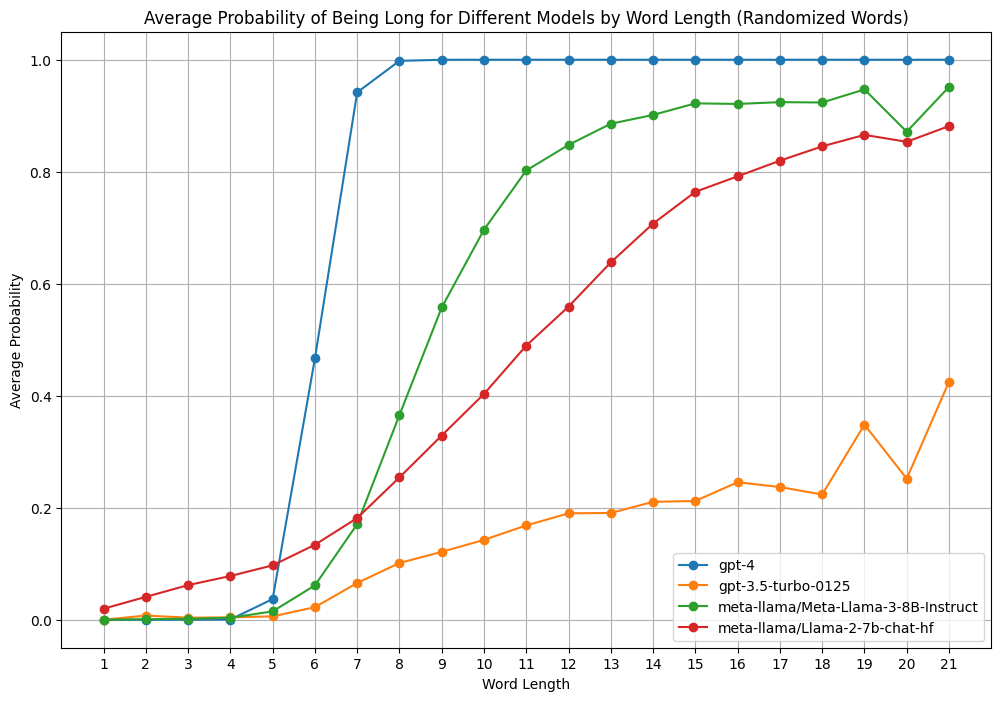

In [32]:
plot_probabilities(data)
plot_probabilities(data, filter="repeats")
plot_probabilities(data, filter="random")
plot_probabilities(data, filter="shuffled")

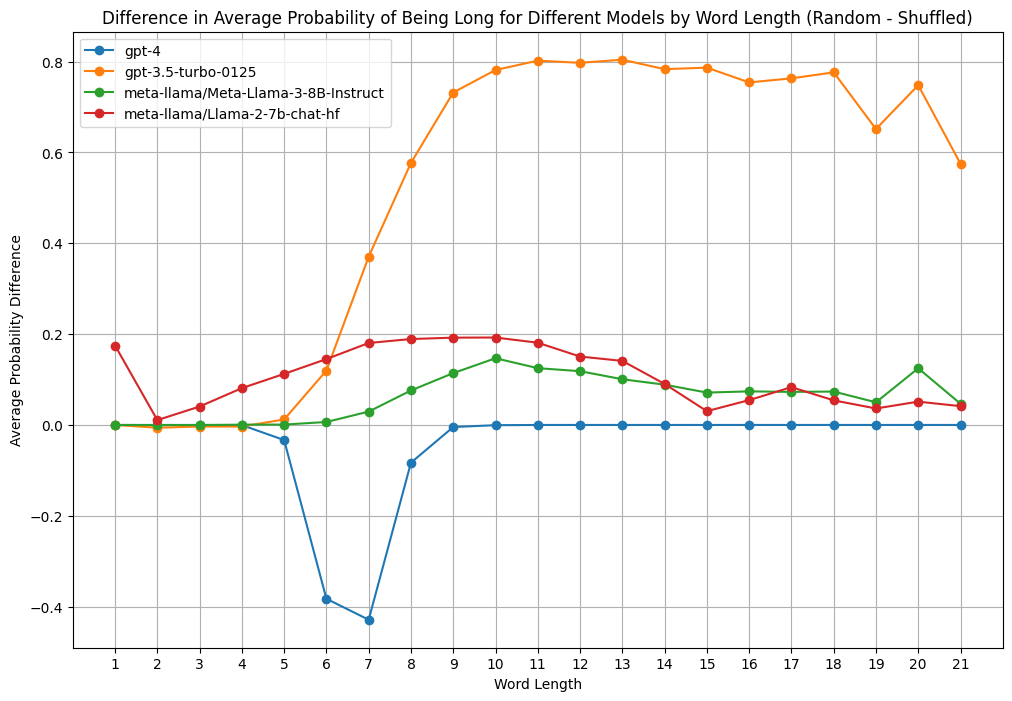

In [31]:
plot_shuffled_random_diffs(data)

In [20]:
# Check for each word in data whether for any model's token list, the list is empty
empty_token_lists = {}

# Define the models based on the keys in the data
models = set()
for word, probs in data.items():
    for key in probs.keys():
        if key.endswith('_tokens'):
            models.add(key.split('_')[0])

for word, probs in data.items():
    empty_token_lists[word] = {}
    for model in models:
        model_key = f"{model}_tokens"
        if model_key in probs and len(probs[model_key]) == 0:
            empty_token_lists[word][model] = True
        else:
            empty_token_lists[word][model] = False

# Print out words with empty token lists for any model
for word, models in empty_token_lists.items():
    for model, is_empty in models.items():
        if is_empty:
            print(f"Word '{word}' has an empty token list for model '{model}'")
